In [1]:
import pandas as pd

In [2]:
df = pd.read_json('df_vitesse.json')

In [3]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,speed_in_kmh,jours,creneaux
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1502.171837,11.885316,Monday,4
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1808.659969,9.820778,Sunday,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6379.687175,10.813029,Tuesday,2
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1483.632481,12.450063,Wednesday,4
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1187.037659,9.823760,Saturday,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,1227.089623,5.678050,Friday,3
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6046.211843,33.231088,Sunday,1
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,7821.531849,36.855386,Friday,1
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1092.524008,10.544468,Tuesday,3


In [67]:
df.store_and_fwd_flag = df.store_and_fwd_flag.map(lambda x: 1 if x=='Y' else 0)

In [69]:
df.store_and_fwd_flag.value_counts()

0    1450599
1       8045
Name: store_and_fwd_flag, dtype: int64

In [70]:
jours = {'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}
df.jours = df.jours.map(lambda x: jours[x])

In [71]:
df.jours.value_counts()

5    223533
6    220868
4    218574
3    210136
2    202749
7    195366
1    187418
Name: jours, dtype: int64

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [55]:
import matplotlib.pyplot as plt
import numpy as np

In [58]:
import seaborn as sns

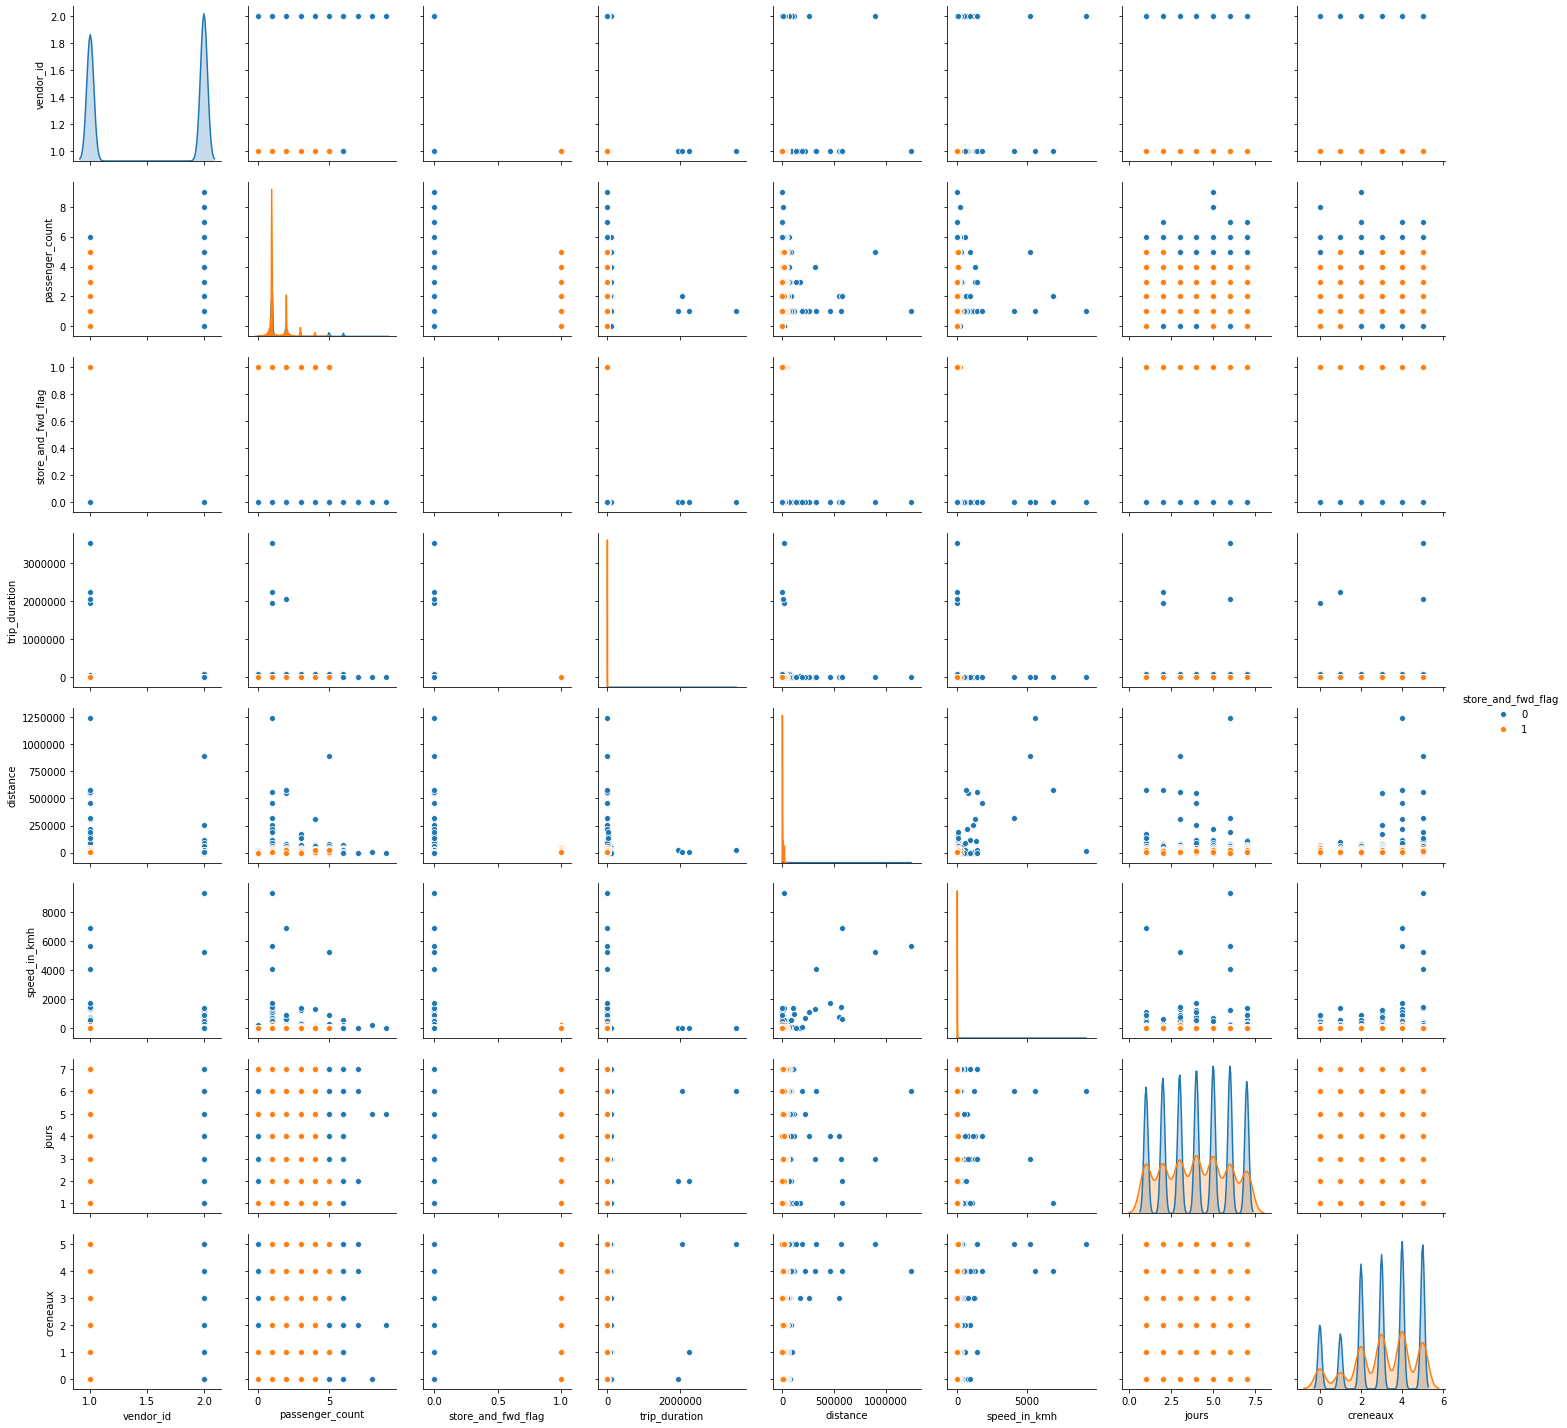

In [75]:
sns.pairplot(df.drop(['id','pickup_datetime','dropoff_datetime','pickup_longitude','pickup_latitude','dropoff_latitude','dropoff_longitude'],axis=1),hue='store_and_fwd_flag')

In [111]:
X = df.drop(['id','pickup_datetime','dropoff_datetime','trip_duration'],axis=1)
y = df.trip_duration

In [89]:
from sklearn.metrics import mean_squared_error

In [112]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)
reg = LinearRegression().fit(X, y)

In [113]:
reg.score(X_train,y_train)

0.0114568248008865

In [107]:
reg.coef_

array([ 1.99005125e+02,  5.82838055e+00,  4.29784925e+00,  1.65058430e-01,
       -2.94580790e+01,  3.56893712e+00,  4.50393404e+00])

In [108]:
np.mean((reg.predict(X_test) - y_test)**2)

9784483.436938286

In [109]:
mean_squared_error(y_test,reg.predict(X_test))

9784483.436938437

In [110]:
reg.score(X_test,y_test)

0.04155093801070231

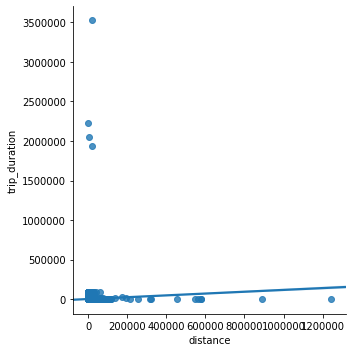

In [59]:
sns.lmplot(x="distance", y="trip_duration", data=df)

In [87]:
new_y = df.loc[df.trip_duration<500000].loc[df.distance<200000]

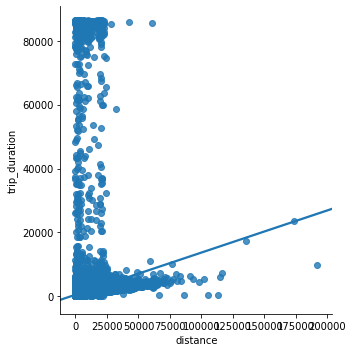

In [88]:
sns.lmplot(x="distance", y="trip_duration", data=new_y)